In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
from tqdm import tqdm
import time
import pickle


# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',None)

from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

<AxesSubplot:xlabel='group', ylabel='APR'>

<AxesSubplot:xlabel='group', ylabel='APR'>

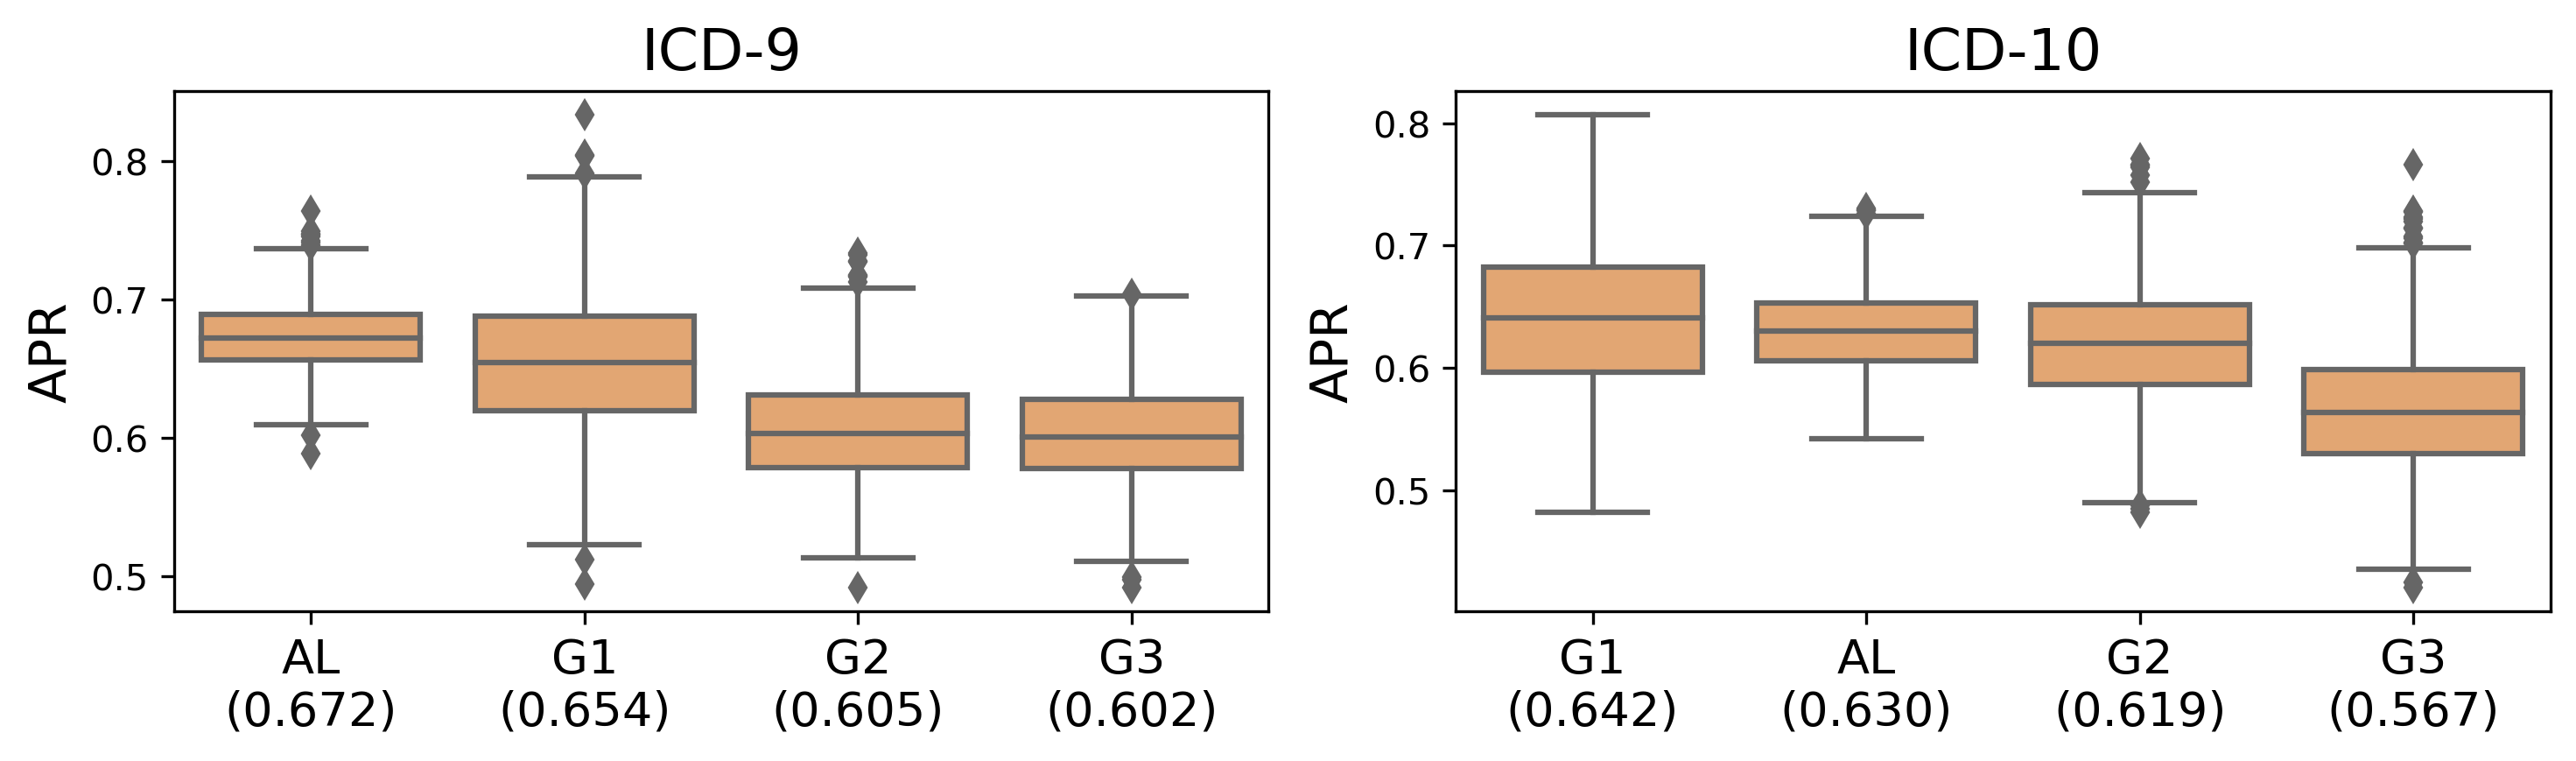

In [6]:
from matplotlib.patches import Rectangle

##
fig=plt.figure(figsize=(10,3), dpi=300)
axes=fig.subplots(1,2)

xgb_res_sig_both=pd.DataFrame()
for ax1, ICD_VER in zip(axes, [9,10]):
    ###
    with open('./xgb_results/XGB_fti_matrix_icd{}.pickle'.format(ICD_VER), 'rb') as f:
        fti_df=pickle.load(f)

    fti_df['group']=fti_df['group'].replace({'[0-120)': 'AL', '[0-65)': 'G1', '[65-80)': 'G2', '[80-120)': 'G3'})
    
    ########## AUC boxplot
    sorted_mean_auc=fti_df.groupby('group')['APR'].mean().sort_values(ascending=False)
    
    sns.boxplot(ax=ax1,data=fti_df, x='group',y='APR', order=sorted_mean_auc.index, color='sandybrown')
    
    new_label=[]
    for ind, val in zip(sorted_mean_auc.index, sorted_mean_auc.values):
        new_label.append('{}\n({:.3f})'.format(ind, val))
    _=ax1.set_xticklabels(new_label, fontsize=13)
    _=ax1.set_xlabel('')
    _=ax1.set_ylabel('APR', fontsize=14)
    _=ax1.set_title('ICD-{}'.format(ICD_VER), fontsize=16)
    
    
fig.tight_layout()
fig.savefig('figures/xgb_res_APR_boxplot.jpg', bbox_inches='tight', dpi=300) 
    
# for ind in xgb_res_sig_both.index:
#     ind
    